## TensorFlow

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### House Price Prediction usin NNs

In [ ]:

# Load data
house = pd.read_csv('../CSV/housing.csv')
X = house[['bedrooms', 'bathrooms']]
Y = house[['price']]  # Make sure Y is 2D for scaler

# Normalize input and output
x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaled = x_scaler.fit_transform(X)
Y_scaled = y_scaler.fit_transform(Y)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train
model.fit(X_scaled, Y_scaled, epochs=5, verbose=0)

# Predict
input_data = x_scaler.transform([[3, 2]])
pred_scaled = model.predict(input_data)

# Convert back to original price scale
pred_price = y_scaler.inverse_transform(pred_scaled)

print(f"Predicted Price: {pred_price[0][0]:.2f}")


In [ ]:
x= np.array([[2,3,4,5,6]]).reshape(-1,1)
y=np.array([1,2,3,4,5])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'), # input layer
    tf.keras.layers.Dense(1) # output node
])

model.compile(loss='mse', metrics=['accuracy'])

model.fit(x,y, epochs= 5)

input= np.array([3,5,6,5,4]).reshape(-1,1)
predict= model.predict(input)
print(predict)



### Handwritten Digits Recognition

In [ ]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train,x_test= x_train/255.0, x_test/255.0

In [17]:

model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train, epochs=10, validation_split=0.1)

d:\Tech\Artificial Intelligence\Python Libraries\.env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8694 - loss: 0.4610 - val_accuracy: 0.9622 - val_loss: 0.1335
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9623 - loss: 0.1284 - val_accuracy: 0.9690 - val_loss: 0.0984
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9757 - loss: 0.0826 - val_accuracy: 0.9735 - val_loss: 0.0924
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9829 - loss: 0.0597 - val_accuracy: 0.9757 - val_loss: 0.0778
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9864 - loss: 0.0454 - val_accuracy: 0.9792 - val_loss: 0.0730
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9901 - loss: 0.0349 - val_accuracy: 0.9813 - val_loss: 0.0707
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9923 - loss: 0.0282 - val_accuracy: 0.9765 - val_loss: 0.0834
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9933 - loss: 0.0214 - 

In [ ]:
model.save('../Models/digit_model.keras')

In [ ]:
# Loading the Model 

model= tf.keras.models.load_model('../Models/digit_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


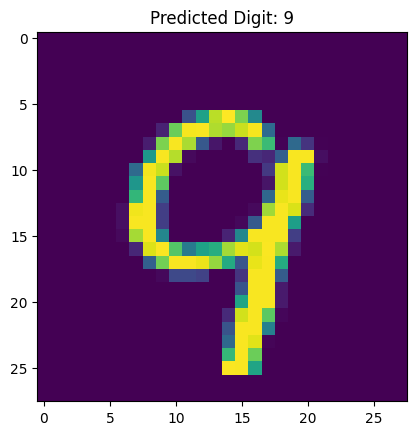

In [18]:
# Predicted test data
predict= model.predict(x_test[16].reshape(1,28,28))

label= np.argmax(predict)

plt.imshow(x_test[16])

plt.title(f'Predicted Digit: {label}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Digit: 5


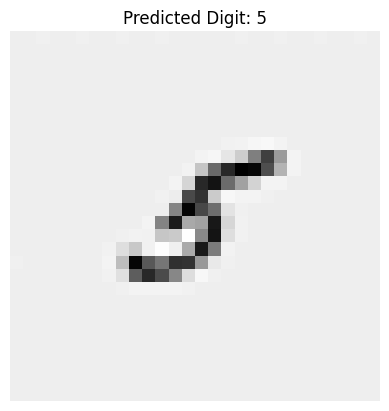

In [23]:
# Predicting own image 

from PIL import Image,ImageOps

img = Image.open('../Images/n5.jpeg').convert("L")  # Convert to grayscale

# Resize to 28x28
img = img.resize((28, 28))
img = ImageOps.invert(img)
img_array = np.array(img) / 255.0

# Reshape for model
img_array = img_array.reshape(1, 28, 28)

# print(img_array)
predictDigit= model.predict(img_array)
label= np.argmax(predictDigit)
print(f'Predicted Digit: {label}')


plt.imshow(img_array.reshape(28,28), cmap='gray')
plt.title(f"Predicted Digit: {label}")
plt.axis('off')
plt.show()

In [ ]:
# Showing image from dataset of MNIST

img_arr= x_test[2]

img= Image.fromarray(img_arr)

img= img.resize((2000,2000),Image.NEAREST)

img.show()

In [ ]:
arr= np.array([[1,3,44,2],[3,4,2,1]])

max= np.argmax(arr, axis=1)

print(max)